In [26]:
import matplotlib.pyplot as  plt 
import numpy as np
import cv2

In [27]:
img = cv2.imread("./image/coin1.png")

In [28]:
s= img.shape
#gray convert
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_gray = cv2.convertScaleAbs(img_gray, alpha = 1.1,beta = -20)
#Convert to scalar is needed
#aipha is contrast 
#beta to brightness Goal to get light to lighter dark to darker   ...Enhacment


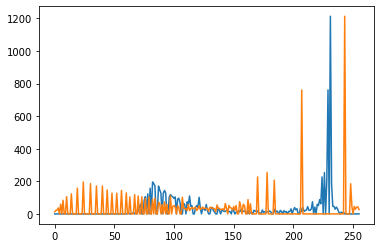

In [11]:
#to create the histogram 
def Hist(image):
    s=image.shape
    H = np.zeros(shape=(256,1))
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i,j]
            H[k,0] = H[k,0] +1 
    return H

histg = Hist(img_gray)

x = histg.reshape(1,256)
y= np.array([])
y = np.append(y,x[0,0])

for i in range(255):
    k = x[0,i+1]+y[i] 
    y= np.append(y,k)
y = np.round( ( y / (s[0] * s[1])) * 255 )


for i in range (s[0]):
    for  j in range (s[1]):
        k = img_gray[i,j]
        img_gray[i,j] = y[k]
        
eql = Hist(img_gray)
plt.plot(histg) #blue before
plt.plot(eql) # o after
plt.show()

In [5]:
cv2.imshow("eql",img_gray)
cv2.imshow("original",img )
cv2.waitKey(0)
if k ==27:
    cv2.destroyAllWindows()

In [9]:
equ = cv2.equalizeHist(img_gray)
cv2.imshow("function ",equ)

k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

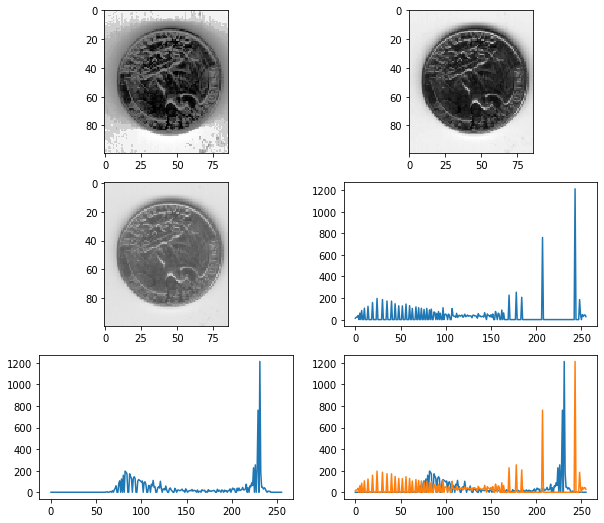

In [34]:

plt.figure(figsize=(10, 9))
plt.subplot(3,2,1)
plt.imshow(equ,cmap="gray") #eq

plt.subplot(3,2,2)
plt.imshow(img_gray,cmap = "gray")#eq

plt.subplot(3,2,3)
plt.imshow(img,cmap="gray")#original

plt.subplot(3,2,4)
plt.plot(eql) 

plt.subplot(3,2,5)
plt.plot(histg)



plt.subplot(3,2,6)
plt.plot(histg)
plt.plot(eql)


plt.show()